## Statsmodels version 0.13.5 is required for dcurves
pip install statsmodels==0.13.5



In [ ]:
pip install statsmodels==0.13.5

In [ ]:
pip install dcurves

In [ ]:
pip install lifelines

In [ ]:
pip install scipy==1.8.0

In [1]:
import pandas as pd
import joblib
import lifelines
import statsmodels
import dcurves
import numpy as np
from dcurves import dca, plot_graphs
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('Miller_2023_train_DR_imputed.csv')
df_validate = pd.read_csv('Miller_2023_validate_DR_imputed.csv')

In [3]:
df_train['REC_GRAFT_STAT'].value_counts(normalize=True)

REC_GRAFT_STAT
0.0    0.695299
1.0    0.304701
Name: proportion, dtype: float64

In [4]:
# Assuming df1 and df2 are already defined with a 'REC_CTR_CD' column

# Get the unique recipient center codes in both dataframes
unique_df_train = set(df_train['REC_CTR_CD'])
unique_df_validate = set(df_validate['REC_CTR_CD'])

# Remove rows in df1 where REC_CTR_CD is not in df2
df_train_filtered = df_train[df_train['REC_CTR_CD'].isin(unique_df_validate)]

# Remove rows in df2 where REC_CTR_CD is not in df1
df_validate_filtered = df_validate[df_validate['REC_CTR_CD'].isin(unique_df_train)]

In [5]:
df_train = df_train_filtered

df_validate = df_validate_filtered

In [6]:
df_train.dropna(inplace=True)
df_validate.dropna(inplace=True)

In [7]:
df_train['Graft_Survival_Time'] = (df_train['Graft_Survival_Time'])/364
df_validate['Graft_Survival_Time'] = (df_validate['Graft_Survival_Time'])/364

In [8]:
from lifelines import CoxPHFitter

# Donor & Recipient Characteristics, including Race and HCV Status

In [9]:
# DONOR-RECIPIENT MODEL FITTED W/ RACE VARIABLE

cph = CoxPHFitter()

cph.fit(
    df_train,
    'Graft_Survival_Time',
    'REC_GRAFT_STAT',
    strata=['REC_CTR_CD'],
    show_progress=True,
    formula = "DON_AGE + DON_RACE_SRTR + DON_CREAT + DON_HIST_HTN + DON_HIST_DB + DON_COD_DON_STROKE + DON_ANTI_HCV + DON_HGT_CM + DON_WGT_KG + DON_CARDIAC_ARREST_AFTER_DEATH + REC_B_MM_EQUIV_TX + REC_DR_MM_EQUIV_TX + REC_COLD_ISCH_TM + EN_BLOC + REC_AGE_AT_TX + REC_DIAB + REC_HTN + CAN_RACE_SRTR + REC_DGN + CAN_PREV_TXFUS + CAN_WGT_KG + CAN_LAST_SRTR_PEAK_PRA + REC_DIAL_YRS + CAN_ANGINA + CAN_PERIPH_VASC + REC_HCV_STAT + DOUBLE_KI "
    
)

Iteration 1: norm_delta = 3.43e-01, step_size = 0.9500, log_lik = -115082.00714, newton_decrement = 1.23e+03, seconds_since_start = 1.9
Iteration 2: norm_delta = 2.20e-02, step_size = 0.9500, log_lik = -113893.09189, newton_decrement = 4.70e+00, seconds_since_start = 3.7
Iteration 3: norm_delta = 1.29e-03, step_size = 0.9500, log_lik = -113888.36697, newton_decrement = 1.87e-02, seconds_since_start = 5.7
Iteration 4: norm_delta = 1.72e-06, step_size = 1.0000, log_lik = -113888.34821, newton_decrement = 4.45e-08, seconds_since_start = 8.5
Convergence success after 4 iterations.


<lifelines.CoxPHFitter: fitted with 67044 total observations, 46576 right-censored observations>

In [10]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 67044 total observations, 46576 right-censored observations>
             duration col = 'Graft_Survival_Time'
                event col = 'REC_GRAFT_STAT'
                   strata = REC_CTR_CD
      baseline estimation = breslow
   number of observations = 67044
number of events observed = 20468
   partial log-likelihood = -113888.35
         time fit was run = 2024-11-13 18:56:20 UTC

---
                                coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                       
DON_AGE                         0.01      1.01      0.00            0.01            0.01                1.01                1.01
DON_RACE_SRTR                   0.16      1.17      0.02            0.12            0.20                1.12                1.22
DON_CREAT                       0.06      1.06      0.01            0.03            0.08                1.04                1.08
DON_HIST_HTN                    0.11      1.11      0.02            0.07            0.14                1.07                1.15
DON_HIST_DB                     0.10      1.11      0.03            0.04            0.17                1.04                1.18
DON_COD_DON_STROKE              0.08      1.08      0.02            0.04            0.11                1.04                1.12
DON_ANTI_HCV                    0.27      1.31      0.05            0.17            0.37                1.19                1.45
DON_HGT_CM                     -0.00      1.00      0.00           -0.01           -0.00                0.99                1.00
DON_WGT_KG                     -0.00      1.00      0.00           -0.01           -0.00                0.99                1.00
DON_CARDIAC_ARREST_AFTER_DEATH -0.26      0.77      0.06           -0.37           -0.14                0.69                0.87
REC_B_MM_EQUIV_TX              -0.01      0.99      0.01           -0.03            0.01                0.97                1.01
REC_DR_MM_EQUIV_TX              0.04      1.04      0.01            0.02            0.06                1.02                1.07
REC_COLD_ISCH_TM                0.01      1.01      0.00            0.01            0.01                1.01                1.01
EN_BLOC                        -0.11      0.90      0.07           -0.25            0.04                0.78                1.04
REC_AGE_AT_TX                  -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
REC_DIAB                        0.13      1.14      0.02            0.10            0.16                1.10                1.18
REC_HTN                         0.03      1.03      0.02           -0.01            0.07                0.99                1.07
CAN_RACE_SRTR                   0.26      1.30      0.02            0.23            0.29                1.25                1.34
REC_DGN                        -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
CAN_PREV_TXFUS                  0.19      1.21      0.02            0.16            0.22                1.17                1.24
CAN_WGT_KG                      0.00      1.00      0.00            0.00            0.00                1.00                1.00
CAN_LAST_SRTR_PEAK_PRA          0.00      1.00      0.00            0.00            0.00                1.00                1.00
REC_DIAL_YRS                    0.01      1.01      0.00            0.01            0.02                1.01                1.02
CAN_ANGINA                     -0.17      0.85      0.02           -0.21           -0.12                0.81                0.89
CAN_PERIPH_VASC                 0.29      1.33      0.03            0.22            0.36                1.25                1.43
REC_HCV_STAT                    0.22      1.24      0.03            0.16            0.

In [ ]:
# Predicted survival functions for each patient at up to 5 years post-transplant

cph_pred_vals = \
    cph.predict_survival_function(df_validate,
                                    times = [5])


time = 5

df_validate['5_yr_survival_prob'] = cph_pred_vals.loc[time].values # Graft survival probability prediction at 5 years post-transplant

df_validate['graft_failure_5_years'] = [1-val for val in cph_pred_vals.iloc[0,:]] #--> Graft Failure probability



In [17]:
from dcurves import dca, plot_graphs

In [ ]:
# Donor and Recipient Characteristics, With Race

stdca_coxph_results = \
          dca(
              data=df_validate,
              outcome='REC_GRAFT_STAT',
              modelnames=['graft_failure_5_years'],
              thresholds=np.arange(0, 0.5, 0.01),
              time=5,
              time_to_outcome_col='Graft_Survival_Time'
          )
  
plot_graphs(
    plot_df=stdca_coxph_results,
    graph_type='net_benefit',
    y_limits=[-0.1, 0.2]
  )

In [18]:
coefficients = cph.params_
print(coefficients)

covariate
DON_AGE                           0.012222
DON_RACE_SRTR                     0.160009
DON_CREAT                         0.058154
DON_HIST_HTN                      0.107797
DON_HIST_DB                       0.102371
DON_COD_DON_STROKE                0.076404
DON_ANTI_HCV                      0.272184
DON_HGT_CM                       -0.003856
DON_WGT_KG                       -0.004199
DON_CARDIAC_ARREST_AFTER_DEATH   -0.255506
REC_B_MM_EQUIV_TX                -0.013776
REC_DR_MM_EQUIV_TX                0.043853
REC_COLD_ISCH_TM                  0.010835
EN_BLOC                          -0.107823
REC_AGE_AT_TX                    -0.000350
REC_DIAB                          0.131724
REC_HTN                           0.026851
CAN_RACE_SRTR                     0.260066
REC_DGN                          -0.000032
CAN_PREV_TXFUS                    0.187876
CAN_WGT_KG                        0.001757
CAN_LAST_SRTR_PEAK_PRA            0.001531
REC_DIAL_YRS                      0.010374
C

In [ ]:
# Define a function to calculate KDRI for a given donor's data row
def calculate_kdri(row, coefficients):
    log_hazard = sum(coefficients[var] * row[var] for var in coefficients.index)
    kdri = np.exp(log_hazard)
    return kdri

# Apply the function to your dataset
df_validate['KDRI'] = df_validate.apply(lambda row: calculate_kdri(row, coefficients), axis=1)


#Calculate KDPI: 
# Function to calculate KDPI from KDRI using the reference distribution
reference_kdri = np.sort(df_validate['KDRI'].values)

def calculate_kdpi(kdri, reference_kdri):
    # Calculate the percentile rank (KDPI) for the given KDRI
    percentile = (np.sum(reference_kdri <= kdri) / len(reference_kdri)) * 100
    return percentile

# Apply the function to your dataset to create the KDPI column
df_validate['KDPI'] = df_validate['KDRI'].apply(lambda x: calculate_kdpi(x, reference_kdri))

In [ ]:
# Iterate through all KDRI values in df_validate 
# plot net benefit curves calculated using the equation: (1/N)(TP-FP)(p_threshold/1-p_threshold) where TP and FP are calculated by 3 different strategies:

1.) Accept all strategy (or assume all grafts survive) --> calculate by iterating through KDRI values in dataset; TP = prevalence, or REC_GRAFT_STAT ==0.SUM, FN = N- TP
2.) Accept None strategy (or assume no grafts survive) TP = 0, FN = 0
3.) Use graft survival probability corresponding to KDRI to calculate net benefit, where 

Help me perform decision curve analysis using the strategies described below: 

# Iterate through all KDRI values in df_validate 
# plot KDRI on the x-axis
# plot net benefit on the y-axis generating curves for three different strategies defined below:

1.) Accept all strategy (or assume all grafts survive) --> calculate by iterating through KDRI values in dataset; 

# Precompute total positives (graft survivals) and negatives (graft failures) in the data:
total_negatives = df_validate['REC_GRAFT_STAT']==1.sum() 
total_positives = N - total_negatives  

TP =  df_validate['REC_GRAFT_STAT'] ==0.sum()
FP = total positive - TP

net benefit: (1/N)(TP-FP)(p_threshold/1-p_threshold), where p_threshold is the graft survival probability corresponding to the KDRI

2.) Accept None strategy (or assume no grafts survive): TP = 0, FN = 0, Net Benefit = 0 


3.) Use graft survival probability corresponding to KDRI to calculate net benefit, where and desired_probability is 0.83

 is_below_threshold = df_validate['5_yr_survival_prob'] < desired_probability
    
TP = ((is_below_threshold) & (df_validate['REC_GRAFT_STAT'] == 0)).sum()  # True Positives (survivals correctly identified)
FP = ((is_below_threshold) & (df_validate['REC_GRAFT_STAT'] == 1)).sum()

p_threshold = the KDRI you are iterating on

net benefit: (1/N)(TP-FP)(p_threshold/1-p_threshold) 


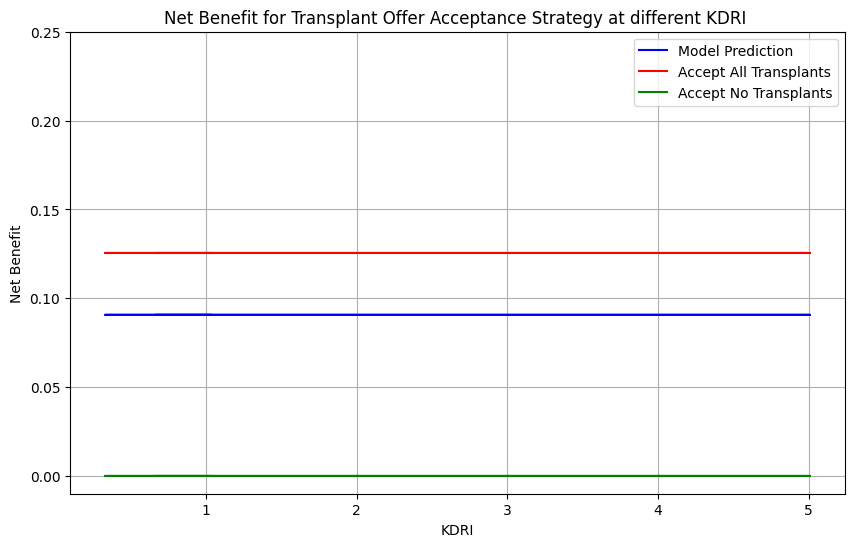

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# array of KDRI values from validation set
kdri_values = df_validate['KDRI'].to_numpy()
N = len(df_validate)  # Total number of patients

# Initialize lists to store net benefit values for each strategy
net_benefit_model = []
net_benefit_accept_all = []
net_benefit_accept_none = []  # Always 0 as no transplants are accepted

# Set the desired probability threshold for survival benefit based on patient preference
desired_probability = 0.83
odds_ratio = desired_probability / (1 - desired_probability)  # Converts desired probability to an odds ratio

# Precompute "Accept All" net benefit value, since it doesn't change across thresholds
TP_accept_all = (df_validate['REC_GRAFT_STAT'] == 0).sum()  # Correctly predicted graft survivals
FN_accept_all = N - TP_accept_all  # Actual graft failures
net_benefit_accept_all_value = (TP_accept_all / N) - (FN_accept_all / N) * odds_ratio

# Loop over each value in kdri_values
for kdri_value in kdri_values:
    # Vectorized calculations for TP and FP based on the survival probability (corresponding to KDRI value in kdri_values )
    is_below_threshold = df_validate['5_yr_survival_prob'] < desired_probability
    TP = ((is_below_threshold) & (df_validate['REC_GRAFT_STAT'] == 0)).sum()  # True Positives (survivals correctly identified)
    FP = ((is_below_threshold) & (df_validate['REC_GRAFT_STAT'] == 1)).sum()  # False Positives (failures incorrectly predicted as survivals)

    # Calculate net benefit for model strategy at the current threshold
    net_benefit_model_value = (TP / N) - (FP / N) * odds_ratio
    net_benefit_model.append(net_benefit_model_value)

    # Store "Accept All" and "Accept None" values
    net_benefit_accept_all.append(net_benefit_accept_all_value)
    net_benefit_accept_none.append(0)  # Always zero for "Accept None" strategy

# Plot the results for different thresholds
plt.figure(figsize=(10, 6))
plt.plot(kdri_values, net_benefit_model, 'b-', label='Model Prediction')
plt.plot(kdri_values, net_benefit_accept_all, 'r-', label='Accept All Transplants')
plt.plot(kdri_values, net_benefit_accept_none, 'g-', label='Accept No Transplants')

plt.xlabel("KDRI")
plt.ylabel("Net Benefit")
plt.title("Net Benefit for Transplant Offer Acceptance Strategy at different KDRI ")
plt.ylim(-0.01, 0.25)
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
curve_A = net_benefit_model

# Donor/Recipient without Race Term

In [ ]:
df_train = df_validate.drop('DON_RACE_SRTR', axis=1)
df_validate = df_validate.drop('DON_RACE_SRTR', axis=1)

In [ ]:
from lifelines import CoxPHFitter

In [ ]:
# Donor Recipient model without race term

cph1 = CoxPHFitter()

cph1.fit(
    df_train,
    'Graft_Survival_Time',
    'REC_GRAFT_STAT',
    strata=['REC_CTR_CD'],
    show_progress=True,
    formula=( "DON_AGE  + DON_CREAT + DON_HIST_HTN + DON_HIST_DB + DON_COD_DON_STROKE + DON_ANTI_HCV + DON_HGT_CM + DON_WGT_KG + DON_CARDIAC_ARREST_AFTER_DEATH + REC_B_MM_EQUIV_TX + REC_DR_MM_EQUIV_TX + REC_COLD_ISCH_TM + EN_BLOC + REC_AGE_AT_TX + REC_DIAB + REC_HTN + CAN_RACE_SRTR + REC_DGN + CAN_PREV_TXFUS + CAN_WGT_KG + CAN_LAST_SRTR_PEAK_PRA + REC_DIAL_YRS + CAN_ANGINA + CAN_PERIPH_VASC + REC_HCV_STAT + DOUBLE_KI")
)

cph1.print_summary()

In [ ]:
cph_pred_vals = \
    cph1.predict_survival_function(df_validate,
                                    times = [5])


                                   
df_validate['graft_failure_5_years'] = [1-val for val in cph_pred_vals.iloc[0,:]]

In [ ]:
stdca_coxph_results = \
          dca(
              data=df_validate,
              outcome='REC_GRAFT_STAT',
              modelnames=['graft_failure_5_years'],
              thresholds=np.arange(0, 0.5, 0.01),
              time=5,
              time_to_outcome_col='Graft_Survival_Time'
          )
  
plot_graphs(
    plot_df=stdca_coxph_results,
    graph_type='net_benefit',
    y_limits=[-0.1, 0.2]
  )

In [ ]:
coefficients = cph1.params_
print(coefficients)

In [ ]:
# Define a function to calculate KDRI for a given donor's data row
def calculate_kdri(row, coefficients):
    log_hazard = sum(coefficients[var] * row[var] for var in coefficients.index)
    kdri = np.exp(log_hazard)
    return kdri

# Apply the function to your dataset
df_validate['KDRI'] = df_validate.apply(lambda row: calculate_kdri(row, coefficients), axis=1)


#Calculate KDPI: 
# Function to calculate KDPI from KDRI using the reference distribution
reference_kdri = np.sort(df_validate['KDRI'].values)

def calculate_kdpi(kdri, reference_kdri):
    # Calculate the percentile rank (KDPI) for the given KDRI
    percentile = (np.sum(reference_kdri <= kdri) / len(reference_kdri)) * 100
    return percentile

# Apply the function to your dataset to create the KDPI column
df_validate['KDPI'] = df_validate['KDRI'].apply(lambda x: calculate_kdpi(x, reference_kdri))

In [ ]:
# Set threshold range for KDRI
kdri_thresholds = np.arange(0.48, 3.61, 0.001)  # Thresholds to evaluate (based on 2010 OPTN mapp8ing table)
N = len(df_validate)  # Total number of patients

# Initialize lists to store net benefit values for each strategy
net_benefit_model = []
net_benefit_accept_all = []
net_benefit_accept_none = []  # Always 0 as no transplants are accepted

# Set the desired probability threshold for survival benefit (e.g., 83% threshold for net benefit calculation)
desired_probability = 0.83
odds_ratio = desired_probability / (1 - desired_probability)  # Converts 0.83 to an odds ratio

# Precompute total positives (graft survivals) and negatives (graft failures) in the data
total_negatives = df_validate['REC_GRAFT_STAT'].sum()  # Total graft failures
total_positives = N - total_negatives  # Total graft survivals

# Precompute "Accept All" net benefit value, since it doesn't change across thresholds
TP_accept_all = (df_validate['REC_GRAFT_STAT'] == 0).sum()  # Correctly predicted graft survivals
FN_accept_all = (df_validate['REC_GRAFT_STAT'] == 1).sum()  # Actual graft failures
net_benefit_accept_all_value = (TP_accept_all / N) - (FN_accept_all / N) * odds_ratio

# Loop over each threshold in kdri_thresholds
for threshold in kdri_thresholds:
    # Vectorized calculations for TP and FP based on the current threshold
    is_below_threshold = df_validate['KDRI'] < threshold
    TP = ((is_below_threshold) & (df_validate['REC_GRAFT_STAT'] == 0)).sum()  # True Positives (survivals correctly identified)
    FP = ((is_below_threshold) & (df_validate['REC_GRAFT_STAT'] == 1)).sum()  # False Positives (failures incorrectly predicted as survivals)

    # Calculate net benefit for model strategy at the current threshold
    net_benefit_model_value = (TP / N) - (FP / N) * odds_ratio
    net_benefit_model.append(net_benefit_model_value)

    # Store "Accept All" and "Accept None" values
    net_benefit_accept_all.append(net_benefit_accept_all_value)
    net_benefit_accept_none.append(0)  # Always zero for "Accept None" strategy

# Plot the results for different thresholds
plt.figure(figsize=(10, 6))
plt.plot(kdri_thresholds, net_benefit_model, 'b-', label='Model Prediction')
plt.plot(kdri_thresholds, net_benefit_accept_all, 'r-', label='Accept All Transplants')
plt.plot(kdri_thresholds, net_benefit_accept_none, 'g-', label='Accept No Transplants')

plt.xlabel("KDRI")
plt.ylabel("Net Benefit")
plt.title("Net Benefit for Transplant Offer Acceptance Strategy at different KDRI Thresholds")
plt.ylim(-0.01, 0.25)
plt.legend()
plt.grid(True)
plt.show()



 ## Donor-Recipient w/o Race or HCV Status

In [ ]:
df_train = df_validate.drop('DON_ANTI_HCV', axis=1)
df_validate = df_validate.drop('DON_ANTI_HCV', axis=1)

In [ ]:
# Donor Recipient model without race term

cph2 = CoxPHFitter()

cph2.fit(
    df_train,
    'Graft_Survival_Time',
    'REC_GRAFT_STAT',
    strata=['REC_CTR_CD'],
    show_progress=True,
    formula=( "DON_AGE  + DON_CREAT + DON_HIST_HTN + DON_HIST_DB + DON_COD_DON_STROKE + DON_HGT_CM + DON_WGT_KG + DON_CARDIAC_ARREST_AFTER_DEATH + REC_B_MM_EQUIV_TX + REC_DR_MM_EQUIV_TX + REC_COLD_ISCH_TM + EN_BLOC + REC_AGE_AT_TX + REC_DIAB + REC_HTN + CAN_RACE_SRTR + REC_DGN + CAN_PREV_TXFUS + CAN_WGT_KG + CAN_LAST_SRTR_PEAK_PRA + REC_DIAL_YRS + CAN_ANGINA + CAN_PERIPH_VASC + REC_HCV_STAT + DOUBLE_KI")
)

cph2.print_summary()

In [ ]:
coefficients = cph2.params_
print(coefficients)

In [ ]:
# Define a function to calculate KDRI for a given donor's data row
def calculate_kdri(row, coefficients):
    log_hazard = sum(coefficients[var] * row[var] for var in coefficients.index)
    kdri = np.exp(log_hazard)
    return kdri

# Apply the function to your dataset
df_validate['KDRI'] = df_validate.apply(lambda row: calculate_kdri(row, coefficients), axis=1)


#Calculate KDPI: 
# Function to calculate KDPI from KDRI using the reference distribution
reference_kdri = np.sort(df_validate['KDRI'].values)

def calculate_kdpi(kdri, reference_kdri):
    # Calculate the percentile rank (KDPI) for the given KDRI
    percentile = (np.sum(reference_kdri <= kdri) / len(reference_kdri)) * 100
    return percentile

# Apply the function to your dataset to create the KDPI column
df_validate['KDPI'] = df_validate['KDRI'].apply(lambda x: calculate_kdpi(x, reference_kdri))

In [ ]:
# Set threshold range for KDRI
kdri_thresholds = np.arange(0.48, 3.61, 0.001)  # Thresholds to evaluate (based on 2010 OPTN mapp8ing table)
N = len(df_validate)  # Total number of patients

# Initialize lists to store net benefit values for each strategy
net_benefit_model = []
net_benefit_accept_all = []
net_benefit_accept_none = []  # Always 0 as no transplants are accepted

# Set the desired probability threshold for survival benefit (e.g., 83% threshold for net benefit calculation)
desired_probability = 0.83
odds_ratio = desired_probability / (1 - desired_probability)  # Converts 0.83 to an odds ratio

# Precompute total positives (graft survivals) and negatives (graft failures) in the data
total_negatives = df_validate['REC_GRAFT_STAT'].sum()  # Total graft failures
total_positives = N - total_negatives  # Total graft survivals

# Precompute "Accept All" net benefit value, since it doesn't change across thresholds
TP_accept_all = (df_validate['REC_GRAFT_STAT'] == 0).sum()  # Correctly predicted graft survivals
FN_accept_all = (df_validate['REC_GRAFT_STAT'] == 1).sum()  # Actual graft failures
net_benefit_accept_all_value = (TP_accept_all / N) - (FN_accept_all / N) * odds_ratio

# Loop over each threshold in kdri_thresholds
for threshold in kdri_thresholds:
    # Vectorized calculations for TP and FP based on the current threshold
    is_below_threshold = df_validate['KDRI'] < threshold
    TP = ((is_below_threshold) & (df_validate['REC_GRAFT_STAT'] == 0)).sum()  # True Positives (survivals correctly identified)
    FP = ((is_below_threshold) & (df_validate['REC_GRAFT_STAT'] == 1)).sum()  # False Positives (failures incorrectly predicted as survivals)

    # Calculate net benefit for model strategy at the current threshold
    net_benefit_model_value = (TP / N) - (FP / N) * odds_ratio
    net_benefit_model.append(net_benefit_model_value)

    # Store "Accept All" and "Accept None" values
    net_benefit_accept_all.append(net_benefit_accept_all_value)
    net_benefit_accept_none.append(0)  # Always zero for "Accept None" strategy

# Plot the results for different thresholds
plt.figure(figsize=(10, 6))
plt.plot(kdri_thresholds, net_benefit_model, 'b-', label='Model Prediction')
plt.plot(kdri_thresholds, net_benefit_accept_all, 'r-', label='Accept All Transplants')
plt.plot(kdri_thresholds, net_benefit_accept_none, 'g-', label='Accept No Transplants')

plt.xlabel("KDRI")
plt.ylabel("Net Benefit")
plt.title("Net Benefit for Transplant Offer Acceptance Strategy at different KDRI Thresholds")
plt.ylim(-0.01, 0.25)
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
curve_B = net_benefit_model

## Calculate Difference in ABC's 

In [ ]:
# Calculate the ABC -- Area Between Two Curves
from scipy.integrate import simps

# Define threshold probabilities and the decision curve values
kdri_thresholds = np.arange(0.48, 3.61, 0.001)

curve_A = np.array(curve_A)
curve_B = np.array(curve_B)

# Calculate the absolute difference between curves at each threshold
diff = np.abs(curve_A - curve_B)

# Integrate the absolute difference to find the area between curves
ABC = simps(diff, kdri_thresholds)

print(f"Area Between Curves (ABC): {ABC}")


## Determine if difference in ABC's is statistically significant

In [ ]:

# Function to calculate the area between curves (ABC)
def calculate_abc(curve_A, curve_B, thresholds):
    diff = np.abs(curve_A - curve_B)
    return simps(diff, thresholds)

# Calculate the observed ABC
observed_ABC = calculate_abc(curve_A, curve_B, kdri_thresholds)

# Bootstrapping
n_bootstraps = 1000  # Number of bootstrap samples
abc_bootstrapped = []

for _ in range(n_bootstraps):
    # Resample with replacement from both curves
    indices = np.random.choice(range(len(curve_A)), len(curve_A), replace=True)
    resampled_curve_A = curve_A[indices]
    resampled_curve_B = curve_B[indices]
    
    # Calculate ABC for resampled data
    abc_bootstrapped.append(calculate_abc(resampled_curve_A, resampled_curve_B, kdri_thresholds))

# Calculate confidence intervals (e.g., 95%)
alpha = 0.05
lower_bound = np.percentile(abc_bootstrapped, 100 * alpha / 2)
upper_bound = np.percentile(abc_bootstrapped, 100 * (1 - alpha / 2))

print(f"Observed ABC: {observed_ABC}")
print(f"95% Confidence Interval: [{lower_bound}, {upper_bound}]")


In [ ]:
# Function to calculate the ABC after permutation
def permutation_test_abc(curve_A, curve_B, thresholds, n_permutations=1000):
    observed_ABC = calculate_abc(curve_A, curve_B, kdri_thresholds)
    permuted_abc_values = []
    
    for _ in range(n_permutations):
        # Swap values between curve_A and curve_B randomly
        permuted_curve_A = curve_A.copy()
        permuted_curve_B = curve_B.copy()
        swap_indices = np.random.rand(len(curve_A)) > 0.5
        permuted_curve_A[swap_indices], permuted_curve_B[swap_indices] = permuted_curve_B[swap_indices], permuted_curve_A[swap_indices]
        
        # Calculate ABC for permuted data
        permuted_abc = calculate_abc(permuted_curve_A, permuted_curve_B, kdri_thresholds)
        permuted_abc_values.append(permuted_abc)
    
    # Calculate the p-value as the proportion of permuted ABCs greater than the observed ABC
    p_value = np.mean([1 if abc >= observed_ABC else 0 for abc in permuted_abc_values])

    return observed_ABC, p_value

# Perform permutation test
observed_ABC, p_value = permutation_test_abc(curve_A, curve_B, kdri_thresholds)

print(f"Observed ABC: {observed_ABC}")
print(f"P-value: {p_value}")
